In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
def moving_average(data, window_len):
    n = data.shape[0]
    ma = np.zeros_like(data)
    print n, window_len
    for i in xrange(window_len, n):
        ma[i] = sum(data[i-window_len:i])/float(window_len)
    return ma

In [41]:
def univariate_anomalies(data, bins):
    nrow = data.shape[0]
    binned_data = {}
    for i in xrange(0, nrow):
        key = bins[i]
        if key not in binned_data:
            binned_data[key] = []
        binned_data[key].append(data[i])
    nbin = len(binned_data)
    bin_value = []
    perc01 = []
    perc25 = []
    perc50 = []
    perc75 = []
    perc99 = []
    for key in binned_data.keys():
        bin_value.append(key)
        perc01.append(np.percentile(binned_data[key], 1))
        perc25.append(np.percentile(binned_data[key], 25))
        perc50.append(np.percentile(binned_data[key], 50))
        perc75.append(np.percentile(binned_data[key], 75))
        perc99.append(np.percentile(binned_data[key], 99))
    model = np.array([bin_value, perc01, perc25, perc50, perc75, perc99])
    return model.transpose()
    

In [4]:
filename = '../data/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark/A3Benchmark-TS13.csv'

In [5]:
data = pd.read_csv(filename)

In [22]:
(nrow, ncol) = data.shape
data['time'] = pd.Series(map(datetime.datetime.fromtimestamp, data.timestamps))
data['hour_of_day'] = pd.Series(np.zeros(nrow))
for i in xrange(0, nrow):
    data.loc[i,'hour_of_day'] = data.loc[i, 'time'].hour

In [23]:
data.head()

,timestamps,value,anomaly,changepoint,trend,noise,seasonality1,seasonality2,seasonality3,time,hour_of_day
0,1.416722e+09,25.464272,0,0,1,24.464272,0.000000,0.000000,0.000000,2014-11-22 22:00:00,22.0
1,1.416726e+09,619.248412,0,0,2,35.448031,394.650000,166.084181,21.066199,2014-11-22 23:00:00,23.0
2,1.416730e+09,1029.624273,0,0,3,-19.882513,683.553851,320.850000,42.102935,2014-11-23 00:00:00,0.0
3,1.416733e+09,1273.160984,0,0,4,-36.970224,789.300000,453.750421,63.080786,2014-11-23 01:00:00,1.0
4,1.416737e+09,1377.067944,0,0,5,48.815178,683.553851,555.728502,83.970413,2014-11-23 02:00:00,2.0


In [ ]:
plt.plot(data.value[:],)
plt.plot(data.anomaly[:]*100, 'ko')
plt.plot(moving_average(data.value, 12), 'r-')

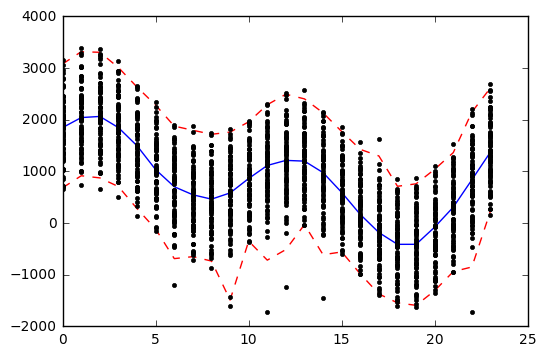

In [55]:
binned_data = univariate_anomalies(data.value, data.hour_of_day)
binned_data_df = pd.DataFrame(binned_data, columns=['hour', 'perc01', 'perc25','perc50','perc75','perc99'])
plt.plot(binned_data_df.hour, binned_data_df.perc50, 'b-')
plt.plot(binned_data_df.hour, binned_data_df.perc99, 'r--')
plt.plot(binned_data_df.hour, binned_data_df.perc01, 'r--')
plt.plot(data.hour_of_day, data.value, 'k.', )


In [26]:
data.hour_of_day[0]

22.0